In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.special as sps
import warnings
from scipy.stats import kurtosis, skew

%matplotlib inline
plt.rcParams["figure.figsize"] = (10.0, 7.0)
warnings.filterwarnings("ignore")

In [2]:
ns = 10000
n_mean = 500
n_sigma = 1000

In [3]:
v = np.random.normal(n_mean, n_sigma, ns)

In [4]:
v = pd.DataFrame(v, columns=["volume"])
v.volume - round(v.volume, 0)
v.head()

,volume
0,1029.855185
1,1673.266825
2,-770.026088
3,485.782613
4,1587.578880


In [5]:
v.volume.mean()

494.1686421364364

In [6]:
v.volume.median()

495.4619267560647

In [7]:
v.volume.value_counts().nlargest(10)

volume
 1029.855185    1
 1084.525367    1
 1210.632811    1
 690.705367     1
 25.341282      1
 1709.053127    1
-1458.683696    1
 1090.355858    1
-141.427597     1
-1310.669132    1
Name: count, dtype: int64

In [8]:
v.volume.std()

1016.4095712110977

In [9]:
np.percentile(v.volume, 50)

495.4619267560647

In [10]:
np.percentile(v.volume, 75)

1201.0616163962584

In [11]:
v.volume.describe()

count    10000.000000
mean       494.168642
std       1016.409571
min      -3716.845882
25%       -186.152342
50%        495.461927
75%       1201.061616
max       4421.136279
Name: volume, dtype: float64

Text(0.5, 1.0, 'Распределение прибыли по пользователям группы 1')

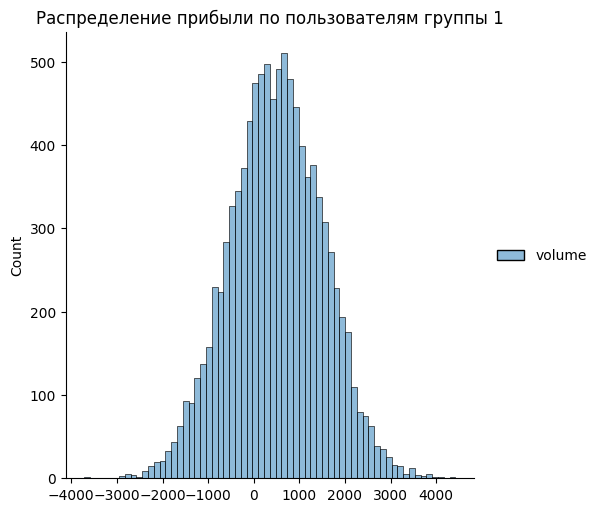

In [12]:
sns.displot(v)
plt.title("Распределение прибыли по пользователям группы 1")

Text(0.5, 1.0, 'Распределение прибыли по пользователям группы 1')

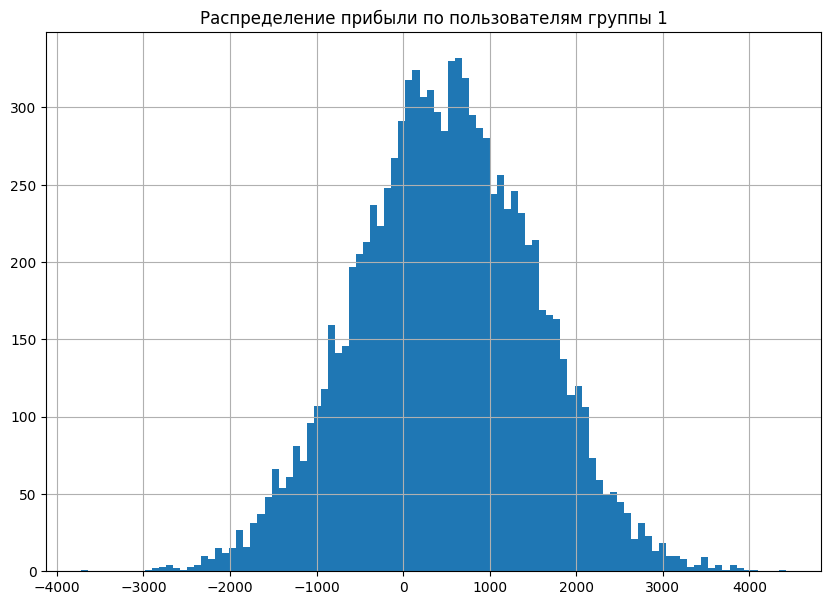

In [13]:
v.volume.hist(bins=100)
plt.title("Распределение прибыли по пользователям группы 1")

In [14]:
def my_basic_research(df=v, column="volume"):
    print("Базовые метрики")
    print(df[column].describe())
    print("-------------------------------------------")

    print("Самые популярные значения метрики, топ 5")
    print(df[column].value_counts().nlargest(5))
    print("-------------------------------------------")

    print("Эксцесс", kurtosis(df[column]))
    print("Ассиметрия", skew(df[column]))

    sns.displot(df[column])
    plt.title("Распределение прибыли по пользователям")

Базовые метрики
count    10000.000000
mean       494.168642
std       1016.409571
min      -3716.845882
25%       -186.152342
50%        495.461927
75%       1201.061616
max       4421.136279
Name: volume, dtype: float64
-------------------------------------------
Самые популярные значения метрики, топ 5
volume
1029.855185    1
1084.525367    1
1210.632811    1
690.705367     1
25.341282      1
Name: count, dtype: int64
-------------------------------------------
Эксцесс -0.030656451931784456
Ассиметрия -0.003978962970034362


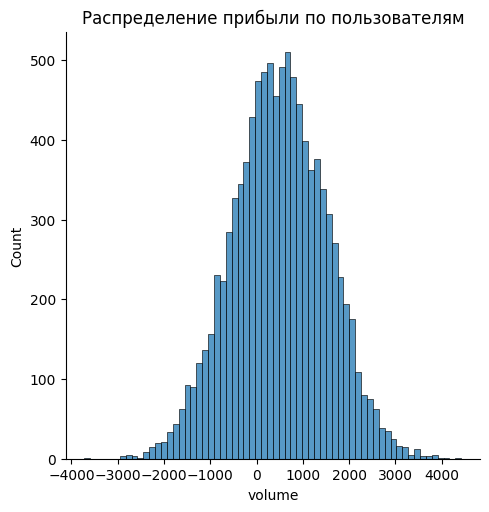

In [15]:
my_basic_research()

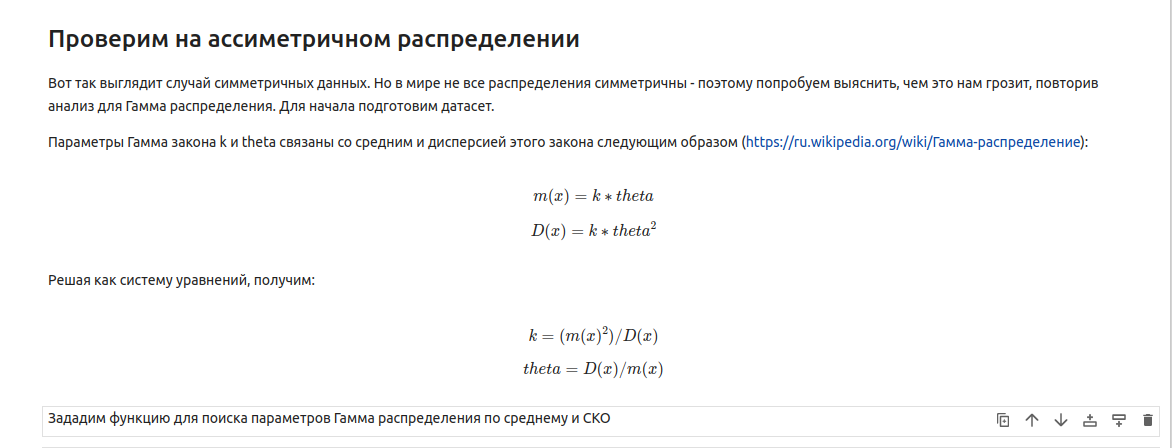

In [16]:
def gamma_params(mean, std):
    shape = round((mean/std)**2, 4)
    scale = round((std**2)/mean, 4)
    return (shape, scale)

In [17]:
shape, scale = gamma_params(n_mean, n_sigma)
df = np.random.gamma(shape, scale, ns)
df = pd.DataFrame(df, columns=["volume"])

df.volume = round(df.volume, 0)

In [18]:
df.head()

,volume
0,539.0
1,2840.0
2,722.0
3,3756.0
4,1.0


Базовые метрики
count    10000.000000
mean       510.525800
std       1019.163968
min          0.000000
25%          5.000000
50%         87.000000
75%        541.250000
max      15497.000000
Name: volume, dtype: float64
-------------------------------------------
Самые популярные значения метрики, топ 5
volume
0.0    1391
1.0     465
2.0     231
3.0     183
4.0     146
Name: count, dtype: int64
-------------------------------------------
Эксцесс 26.573780110341847
Ассиметрия 4.099943717660591


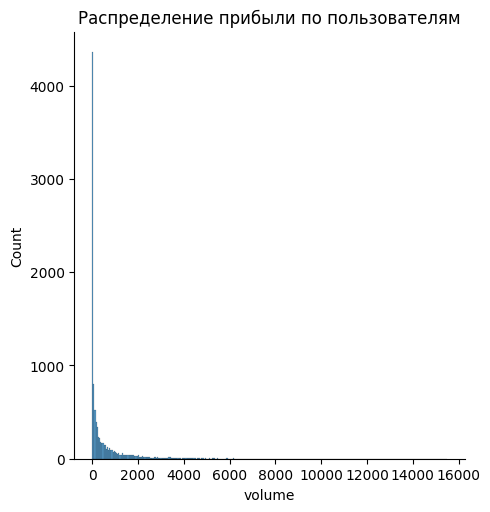

In [19]:
my_basic_research(df, "volume")

Как можно увидеть, теперь мы имеем дело а ассиметричным распределением и все квантили, а такде коэффициенты ассиметрии и эксцесса поменялись, несмотря на равенство средних и ско - и выводы по этим датасетам получаются абсолютно разные.

К примеру, сравним долю убыточных клиентов для первого и второго датасетов:


In [20]:
v[v.volume < 0].count()/len(v)

volume    0.3123
dtype: float64

In [21]:
df[df.volume < 0].count()/len(df)

volume    0.0
dtype: float64

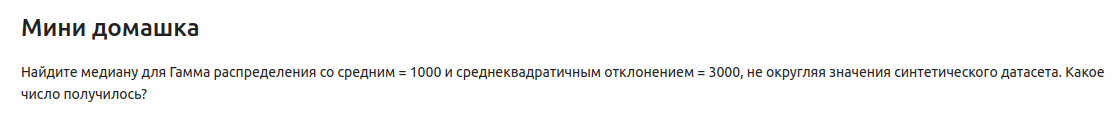

In [22]:
mean_2 = 1000
std_2 = 3000

In [23]:
shape, scale = gamma_params(mean_2, std_2)
df = np.random.gamma(shape, scale, ns)
df = pd.DataFrame(df, columns=["volume"])
df.volume.median()

10.266385141884966

Базовые метрики
             volume
count  1.000000e+04
mean   9.750481e+02
std    2.983369e+03
min    2.274016e-32
25%    1.999478e-02
50%    1.026639e+01
75%    4.160796e+02
max    5.712485e+04
-------------------------------------------
Самые популярные значения метрики, топ 5
volume      
2.274016e-32    1
1.428324e+02    1
1.409577e+02    1
1.412714e+02    1
1.416639e+02    1
Name: count, dtype: int64
-------------------------------------------
Эксцесс [66.06068244]
Ассиметрия [6.53498141]


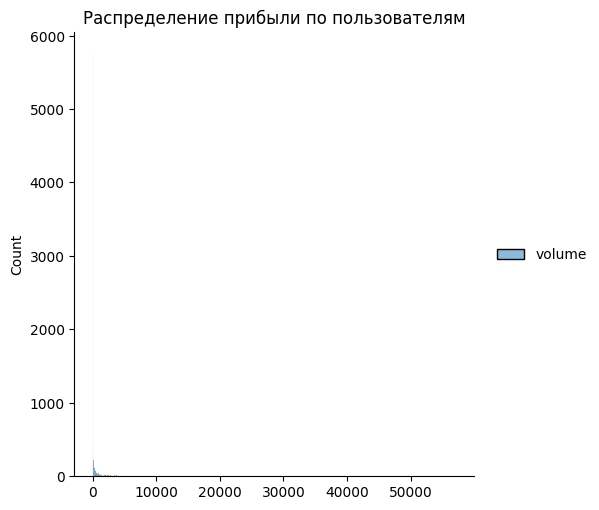

In [24]:
my_basic_research(df, ["volume"])

### Ответ
